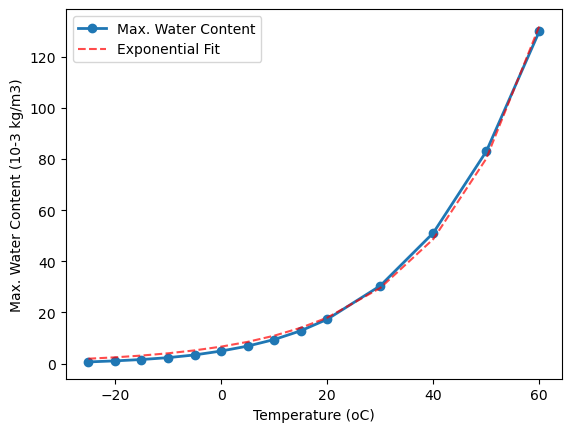


      We have found, by application of an exponential fit, that the maximum water content in saline water as a function of temperature is given by:
      $$
        C(T) = 6.6106 e^{ 0.0499 T }
      $$
      The quality of the fit is given by an R² of 0.9979.
      


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit    

data = """Temperature(oC)	Max. Water Content(10-3 kg/m3)
-25	-13	0.64	0.040
-20	-4	1.05	0.066
-15	5	1.58	0.099
-10	14	2.31	0.14
-5	23	3.37	0.21
0	32	4.89	0.31
5	41	6.82	0.43
10	50	9.39	0.59
15	59	12.8	0.8
20	68	17.3	1.07
30	86	30.4	1.9
40	104	51.1	3.2
50	122	83.0	5.2
60	140	130	8.1"""

data = data.split("\n")

data_cleaned = []
for line in data:
    line_split = line.split("\t")
    if len(line_split) > 2:
        line_split = [line_split[0], line_split[2]]
    data_cleaned.append(line_split)

data = np.array(data_cleaned)   

df = pd.DataFrame(data_cleaned[1:], columns=data_cleaned[0])
df['Temperature(oC)'] = df['Temperature(oC)'].astype(float)
df['Max. Water Content(10-3 kg/m3)'] = df['Max. Water Content(10-3 kg/m3)'].astype(float)

# curve looks exponential
def exponential_fit(T, a, b):
    return a * np.exp(b * T)

params, _ = curve_fit(exponential_fit, df['Temperature(oC)'], df['Max. Water Content(10-3 kg/m3)'], p0=[1, .1])

fig, ax = plt.subplots()
ax.plot(df['Temperature(oC)'], df['Max. Water Content(10-3 kg/m3)'], label='Max. Water Content', marker='o', lw=2)
ax.plot(df['Temperature(oC)'], exponential_fit(df['Temperature(oC)'], params[0], params[1]), label='Exponential Fit', color='red', ls='--', alpha=0.7)
ax.set_xlabel('Temperature (oC)')
ax.set_ylabel('Max. Water Content (10-3 kg/m3)')
ax.legend()
plt.show()

# evaluate quality of fit
residuals = df['Max. Water Content(10-3 kg/m3)'] - exponential_fit(df['Temperature(oC)'], params[0], params[1])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((df['Max. Water Content(10-3 kg/m3)'] - np.mean(df['Max. Water Content(10-3 kg/m3)']))**2)
r_squared = 1 - (ss_res / ss_tot)

# print final output statement
print(f"""
      We have found, by application of an exponential fit, that the maximum water content in saline water as a function of temperature is given by:
      $$
        C(T) = {params[0]:.4f} e^{{ {params[1]:.4f} T }}
      $$
      The quality of the fit is given by an R² of {r_squared:.4f}.
      """)
